In [41]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import qtpy

%matplotlib inline

In [51]:
center = SkyCoord(ra= '17h45m39.60213s', dec='-29d00m22.00s', distance= 8.122*u.kpc, frame= 'icrs')
center_gc = center.galactic
center_gc_cart = center_gc.cartesian
center_gc_cart

<CartesianRepresentation (x, y, z) in kpc
    (8.12199385, -0.00781428, -0.00622558)>

In [42]:
f = open('temp.csv', 'r')
first_time = True
ras = []
decs = []
dists = []
for line in f:
    values = line.split(',')
    if float(values[10]) < 0:
        continue
    else:
        if first_time:
            ras.insert(0,float(values[6])*u.degree)
            decs.insert(0, float(values[8])*u.degree)
            dists.insert(0, 1. / float(values[10])*u.kpc)
            first_time = False
        else: 
            ras.append(float(values[6])*u.degree)
            decs.append(float(values[8])*u.degree)
            dists.append(1. / float(values[10])*u.kpc)


In [43]:
sc = SkyCoord(ras, decs, distance= dists)
sc
scg = sc.galactic
scg
scg_cart = scg.cartesian
# positions of the dr2 matches in cartesian coordinates, excluding those with negative parallaxes 
scg_cart

<CartesianRepresentation (x, y, z) in kpc
    [(-1.16169508,  0.20505364, -0.68215754),
     (-1.43211198, -0.08349908, -1.07214641),
     (-0.02552509, -0.08559294, -0.08031817),
     (-0.44836304,  0.16012057,  0.5849572 ),
     (-0.42737347, -0.85678899,  0.98397064),
     (-0.40770009, -0.266509  ,  0.92146843),
     ( 0.75404393, -1.36227104,  0.38232374),
     ( 1.34356096, -1.97821123, -0.04138955),
     ( 3.27370759, -2.85974019,  1.25827956),
     ( 1.17759144, -0.98633458,  0.333591  ),
     ( 8.63152982, -5.35211468,  0.85083662),
     ( 3.7448579 , -2.34726695,  0.19133047),
     ( 2.07162475,  0.39175444,  1.25064515),
     ( 0.46337475,  0.13826752,  0.22482668),
     ( 0.9252659 , -0.03851817,  0.06898213),
     ( 1.21682485,  3.93817778,  1.89890565),
     ( 0.6783011 ,  1.51205727,  0.01282111),
     ( 0.24486026,  1.42111209,  0.02587354),
     ( 1.88591982, -0.63962585, -1.50858969),
     ( 0.09223629,  0.60623385, -1.1767705 )]>

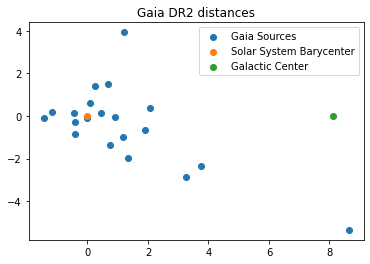

In [52]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(scg_cart.x, scg_cart.y, label='Gaia Sources')
ax.scatter(0,0, label='Solar System Barycenter') # solar system barycenter
ax.scatter(center_gc_cart.x, center_gc_cart.y, label='Galactic Center')

ax.set_title('Gaia DR2 distances')
ax.legend()

In [44]:
# do the same for the dr3 matches
f = open('tempdr3.csv', 'r')
first_time = True
ras3 = []
decs3 = []
dists3 = []
for line in f:
    values = line.split(',')
    if values[6] != '':
        if float(values[6]) < 0:
            continue
        else:
            if first_time:
                ras3.insert(0,float(values[2])*u.degree)
                decs3.insert(0, float(values[4])*u.degree)
                dists3.insert(0, 1. / float(values[6])*u.kpc)
                first_time = False
            else: 
                ras3.append(float(values[2])*u.degree)
                decs3.append(float(values[4])*u.degree)
                dists3.append(1. / float(values[6])*u.kpc)


In [45]:
sc3 = SkyCoord(ras3, decs3, distance= dists3)
sc3
scg3 = sc3.galactic
scg3
scg_cart3 = scg3.cartesian
# positions of the dr3 matches in cartesian coordinates, excluding those with negative parallaxes 
scg_cart3

<CartesianRepresentation (x, y, z) in kpc
    [(-1.57377601,  0.27779101, -0.92413508),
     (-0.34072083,  0.12167908,  0.44452172),
     (-0.45365661, -0.90948098,  1.04448415),
     (-0.80332746, -0.52512623,  1.8156504 ),
     ( 1.62385534, -3.91947704,  0.06618101),
     ( 1.0146917 , -1.83316279,  0.51448034),
     ( 1.26681336, -1.86521089, -0.03902527),
     ( 3.66524557, -3.20176745,  1.40877075),
     ( 1.42306163, -1.19193718,  0.40312837),
     (10.70061249, -6.63508198,  1.05479254),
     ( 1.35442703,  0.2561288 ,  0.81767111),
     ( 0.49026013,  0.1462899 ,  0.23787132),
     ( 0.9343858 , -0.03889789,  0.06966205),
     ( 1.20507337,  3.90014471,  1.88056691),
     ( 0.86188845,  1.92130695,  0.01629124),
     ( 0.72890257,  1.2226078 , -0.11696209),
     ( 0.42968166,  0.72070456, -0.06894708),
     ( 0.29902498,  1.73547152,  0.03159694),
     ( 1.54468379, -0.52389281, -1.23562735),
     ( 0.13001113,  0.85451331, -1.65870994)]>

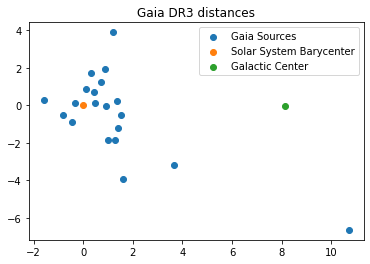

In [50]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(scg_cart3.x, scg_cart3.y, label='Gaia Sources')
ax.scatter(0,0, label='Solar System Barycenter') # solar system barycenter
ax.scatter(center_gc_cart.x, center_gc_cart.y, label='Galactic Center')

ax.set_title('Gaia DR3 distances')
ax.legend()
